## Постановка задачи:

**Ваш друг из соседнего отдела прислал вам файл, где он собирал информацию о сделках с компаниями в течение нескольких месяцев. К сожалению, друг был не слишком аккуратен и не знал, какой ужасный формат он выбрал. Ваша задача заключается в следующем: нужно собрать все данные в нормальный датафрэйм (и сказать другу, чтобы хранил данные аккуратнее). Данные находятся в файле messy_tables.xlsx,  представлены набором таблиц в одном эксельном листе.**

#### Введите сумму по колонке company41, которая получилась после очистки таблицы.

In [1]:
# Импортир библиотек
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Загрузим данные и посмотрим на срез по датафрейму
df = pd.read_excel('messy_tables.xlsx')
df[15:30]

,Unnamed: 0,company41,company51,company50,company76,company47,company27,company48
15,NaN,110,828,253,260,818,15,752
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,company41,company51,company50,company76,company47,company27,company48
19,NaN,361,104,495,652,990,169,488
20,NaN,131,278,449,215,NaN,NaN,427
21,NaN,537,631,870,794,NaN,NaN,186
22,company41,company51,company50,company76,company47,company27,company48,NaN
23,16,151,217,144,993,633,747,NaN
24,819,43,660,NaN,312,936,983,NaN


In [3]:
# Посмотрим на размерность данных
df.shape

(44, 8)

<AxesSubplot:>

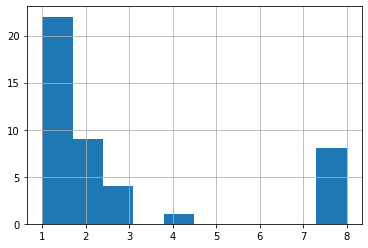

In [4]:
# Посчитаем число пропущенных значений по строкам и отобразим на гистограмме результат
df.isna().sum(axis=1).hist()

Как видно по срезу, так и по гистограмме - промежутки между данными содержать пустые значения, поскольку у нас 8 колонок, то и пропуски содержат 8 NaN. Следовательно, мы можем удалить полностью пустые стоки, т.к. они является разделителями между таблицами в датафрейме.

In [5]:
# Удаляем разделители из данных
df.dropna(how='all', inplace=True)

In [6]:
# Переиндексируем датафрейм
df.reset_index(drop=True, inplace=True)
df[15:25]

,Unnamed: 0,company41,company51,company50,company76,company47,company27,company48
15,NaN,361,104,495,652,990,169,488
16,NaN,131,278,449,215,NaN,NaN,427
17,NaN,537,631,870,794,NaN,NaN,186
18,company41,company51,company50,company76,company47,company27,company48,NaN
19,16,151,217,144,993,633,747,NaN
20,819,43,660,NaN,312,936,983,NaN
21,227,783,589,NaN,516,782,736,NaN
22,625,858,228,NaN,832,197,116,NaN
23,NaN,company41,company51,company50,company76,company47,company27,company48
24,NaN,324,128,97,141,965,750,720


In [7]:
# Отберем все строки, которые содержат значения в самой первой колонке (которые сдвинуты по отношению к другим строкам)
# и скопируем их в другую переменную
table = df.loc[df['Unnamed: 0'].notna()].copy()
table

,Unnamed: 0,company41,company51,company50,company76,company47,company27,company48
18,company41,company51,company50,company76,company47,company27,company48,NaN
19,16,151,217,144,993,633,747,NaN
20,819,43,660,NaN,312,936,983,NaN
21,227,783,589,NaN,516,782,736,NaN
22,625,858,228,NaN,832,197,116,NaN


In [8]:
# Удалим из данных table колонку company48 и зададим 1 строку как название колонок
table.drop(columns=['company48'], inplace=True)
table.columns = table.loc[18]
table.drop(index=18, inplace=True)
table

18,company41,company51,company50,company76,company47,company27,company48
19,16,151,217,144,993,633,747
20,819,43,660,NaN,312,936,983
21,227,783,589,NaN,516,782,736
22,625,858,228,NaN,832,197,116


In [9]:
# Удалим из общего датафрейма строки содержащиеся в table и колонку Unnamed: 0
df.drop(index=table.index.tolist(), inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df[15:25]

,company41,company51,company50,company76,company47,company27,company48
15,361,104,495,652,990,169,488
16,131,278,449,215,NaN,NaN,427
17,537,631,870,794,NaN,NaN,186
18,company51,company50,company76,company47,company27,company48,NaN
23,company41,company51,company50,company76,company47,company27,company48
24,324,128,97,141,965,750,720
25,51,196,826,151,729,924,586
26,700,523,NaN,NaN,NaN,665,85
27,847,727,624,560,902,600,372
28,730,225,51,136,58,344,250


In [10]:
# Проитерируемся по строкам датафрейма и отберем индексы только тех строк, которые содержат названия колонок
idx_row = []

for idx, row in df.iterrows():
    try:
        row.astype(float)
    except:
        idx_row.append(idx)

idx_row

[7, 14, 18, 23, 30]

In [11]:
# Удалим из датафрейма строки содержащие названия колонок
df.drop(index=idx_row, inplace=True)
df[15:25]

,company41,company51,company50,company76,company47,company27,company48
17,537,631,870,794,NaN,NaN,186
24,324,128,97,141,965,750,720
25,51,196,826,151,729,924,586
26,700,523,NaN,NaN,NaN,665,85
27,847,727,624,560,902,600,372
28,730,225,51,136,58,344,250
29,721,768,265,831,624,351,661
31,438,933,508,988,635,257,809
32,427,424,651,790,971,136,134
33,887,260,321,719,377,890,183


In [12]:
# Присоединим к очищенному датафрейму данные записанные в table
df = pd.concat([df, table], ignore_index=True)
df.head()

18,company41,company51,company50,company76,company47,company27,company48
0,580,198,968,220,788,554,479
1,786,271,69,566,NaN,193,636
2,578,NaN,526,74,984,581,951
3,614,NaN,589,575,85,122,454
4,44,849,992,155,527,33,NaN


In [13]:
# Посчитаем сумму по колонке company41
print(f'Cумма по колонке company41, которая получилась после очистки таблицы - {df.company41.sum()}.')

Cумма по колонке company41, которая получилась после очистки таблицы - 14918.
